**Team 2 - MILIND, HARSH, AAYUSH, BHARAT**


In this project, titled "Environmental Data Analysis for Climate Change Prediction," we aim to harness the power of data science and machine learning to better understand and predict the future impacts of climate change. By analyzing large-scale environmental datasets, such as global temperature, carbon emissions, and oceanic conditions, we can uncover trends and patterns that provide critical insights into the ongoing changes in our environment.

The project’s goal is not just to analyze historical data but to build predictive models that can help forecast the future of our climate. These predictions will be invaluable for policymakers, researchers, and other stakeholders who are working on mitigation strategies and solutions to address the complex challenges posed by climate change.

Over the course of this presentation, we’ll explore the objectives, methodology, and tools used in this project, as well as discuss the expected outcomes and the potential for these models to inform climate action.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install meteostat

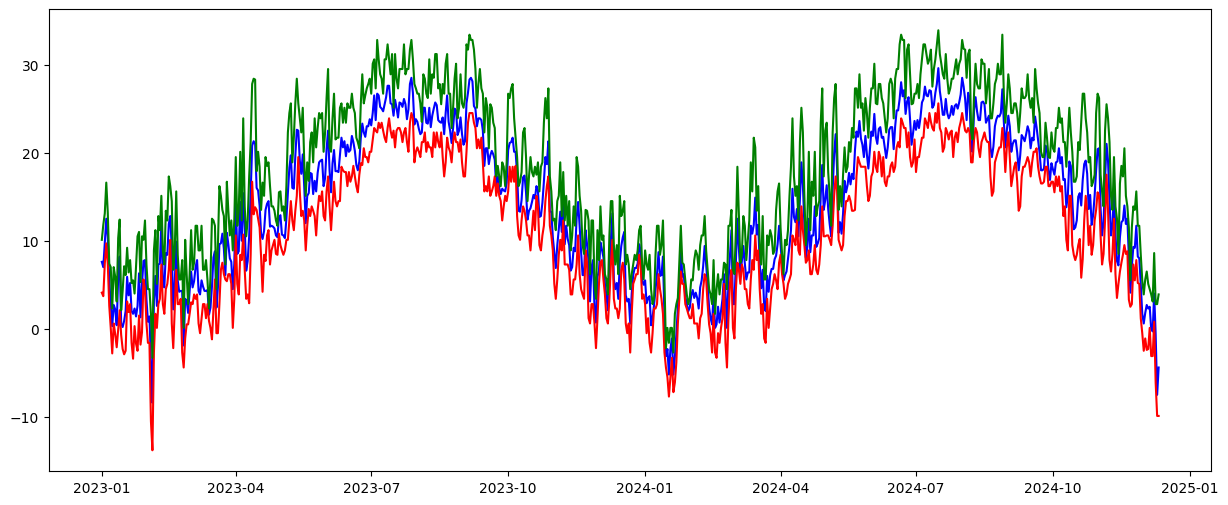

In [ ]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2023, 1, 1)
end = datetime(2024, 12, 11)

# Create Point for NYC
nyc = Point(40.7128, -74.0060, 87)

# Get daily data
data = Daily(nyc, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
plt.figure(figsize=(15,6))
plt.plot(data.index, data['tavg'], color='blue', label='Average Temperature')
plt.plot(data.index, data['tmin'], color='red', label='Minimum Temperature')
plt.plot(data.index, data['tmax'], color='green', label='Maximum Temperature')

In [ ]:
data.head(100)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-01-01,7.6,4.1,10.1,0.7,0.0,244.0,9.6,NaN,1013.5,NaN
2023-01-02,7.0,3.7,11.8,0.5,0.0,220.0,6.9,NaN,1020.1,NaN
2023-01-03,9.7,7.4,13.1,9.4,0.0,332.0,5.3,NaN,1014.7,NaN
2023-01-04,12.5,9.7,16.6,14.9,0.0,293.0,10.2,NaN,1010.8,NaN
2023-01-05,10.4,7.4,13.2,0.0,0.0,47.0,10.4,NaN,1014.2,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-04-06,15.4,10.7,23.9,1.7,0.0,351.0,7.8,NaN,1020.3,NaN
2023-04-07,11.5,6.7,13.9,0.7,0.0,311.0,7.0,NaN,1026.9,NaN
2023-04-08,6.6,3.4,10.5,0.0,0.0,286.0,10.0,NaN,1032.1,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 710 entries, 2023-01-01 to 2024-12-10
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    710 non-null    float64
 1   tmin    710 non-null    float64
 2   tmax    710 non-null    float64
 3   prcp    710 non-null    float64
 4   snow    706 non-null    float64
 5   wdir    710 non-null    float64
 6   wspd    710 non-null    float64
 7   wpgt    0 non-null      float64
 8   pres    710 non-null    float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 61.0 KB


In [ ]:
data.drop(['wpgt', 'tsun'], axis=1, inplace=True)

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.shape

(710, 8)

In [ ]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
time,,,,,,,,
2023-01-01,7.6,4.1,10.1,0.7,0.0,244.0,9.6,1013.5
2023-01-02,7.0,3.7,11.8,0.5,0.0,220.0,6.9,1020.1
2023-01-03,9.7,7.4,13.1,9.4,0.0,332.0,5.3,1014.7
2023-01-04,12.5,9.7,16.6,14.9,0.0,293.0,10.2,1010.8
2023-01-05,10.4,7.4,13.2,0.0,0.0,47.0,10.4,1014.2
...,...,...,...,...,...,...,...,...
2024-12-06,-0.0,-3.1,3.9,0.0,99.0,291.0,11.7,1018.9
2024-12-07,-0.3,-3.1,3.1,0.0,79.0,250.0,18.6,1019.6
2024-12-08,4.0,0.8,8.6,0.0,30.0,249.0,18.6,1011.9


In [ ]:
data.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,14.247042,10.935775,18.214507,3.334366,1.167606,204.123944,10.574366,1016.226479
std,8.265956,8.150152,8.806806,8.160561,8.113707,107.869018,4.283951,7.383256
min,-8.400000,-13.800000,-3.300000,0.000000,0.000000,0.000000,3.600000,993.000000
25%,7.300000,3.950000,11.200000,0.000000,0.000000,84.250000,7.700000,1011.725000
50%,14.600000,10.600000,18.700000,0.000000,0.000000,251.000000,9.600000,1016.350000
75%,21.700000,18.400000,26.200000,2.300000,0.000000,282.000000,12.200000,1020.800000
max,29.600000,25.600000,33.900000,78.900000,100.000000,359.000000,39.100000,1036.700000


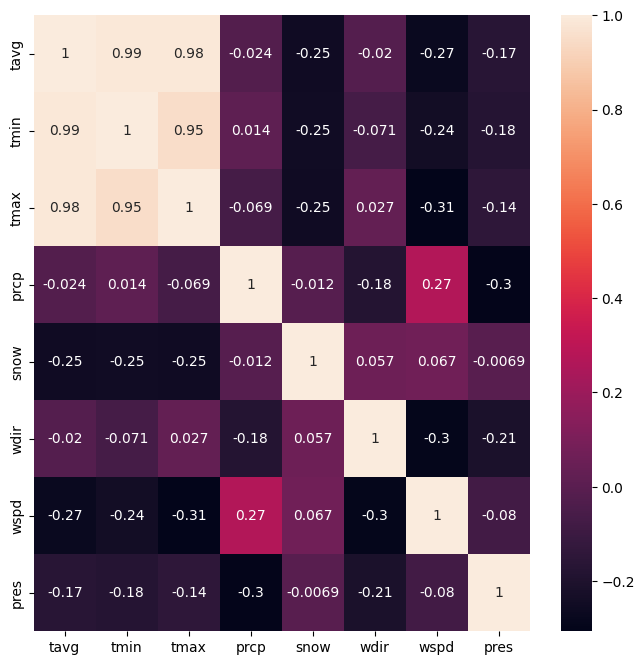

In [ ]:
corr_matrix = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

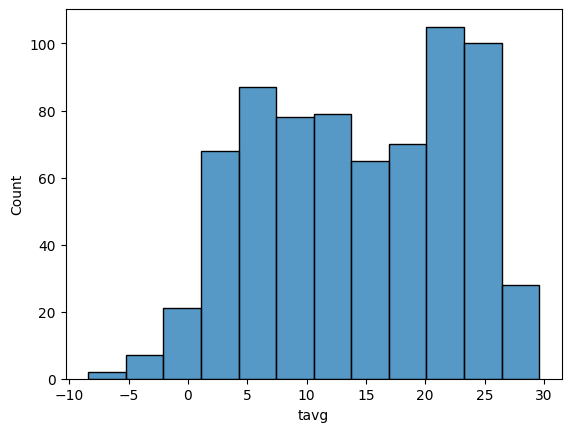

In [ ]:
sns.histplot(data['tavg'])
plt.show()

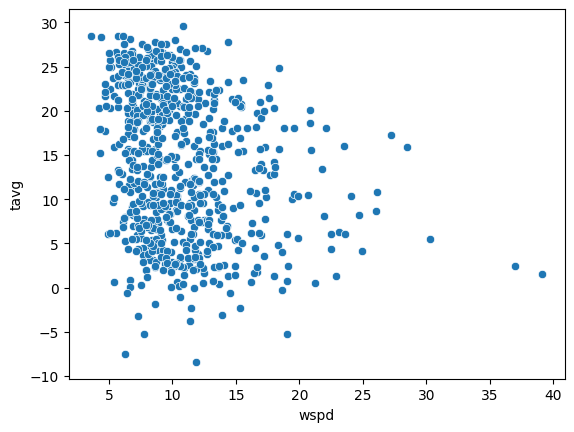

In [ ]:
sns.scatterplot(x='wspd', y='tavg', data=data)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['tavg']])

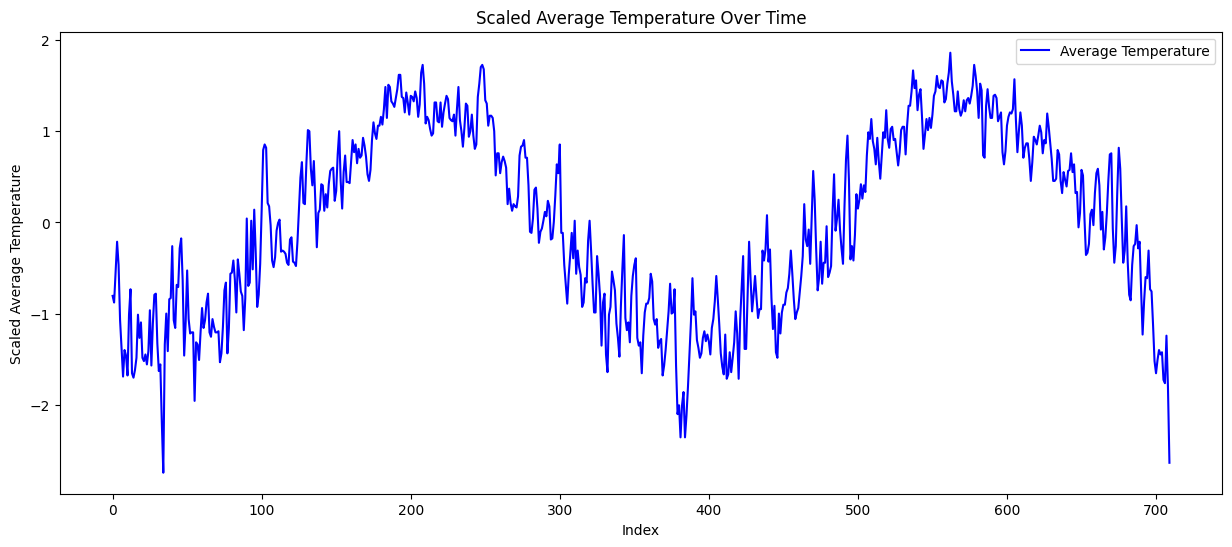

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(len(data_scaled)), data_scaled[:, 0], color='blue', label='Average Temperature')
plt.xlabel("Index") # Label the x-axis
plt.ylabel("Scaled Average Temperature") # Label the y-axis
plt.title("Scaled Average Temperature Over Time") # Add a title
plt.legend() # Show the legend
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from re import X
sequence_length = 30

temp_data = data['tavg'].values.reshape(-1, 1)

def prepare_dataset(data, sequence_length):
  X, Y = [], []
  for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length].tolist())
    Y.append(data[i+sequence_length])
  return np.array(X), np.array(Y)

X, Y = prepare_dataset(temp_data, sequence_length)

X = X.reshape(X.shape[0], X.shape[1], 1)
Y = Y.reshape(Y.shape[0], Y.shape[1], 1)

  # X_train, Y_train = prepare_dataset(temp_data[:int(len(temp_data)*0.8)], sequence_length)
  # X_test, Y_test = prepare_dataset(temp_data[int(len(temp_data)*0.8):], sequence_length)

train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size, :], X[train_size:len(X), :]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# X_train, Y_train = prepare_dataset(temp_data[:int(len(temp_data)*0.8)], sequence_length)
# X_test, Y_test = prepare_dataset(temp_data[int(len(temp_data)*0.8):], sequence_length)

model.fit(X_train, Y_train, epochs=50, batch_size=32)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

scaler = MinMaxScaler(feature_range=(0, 1))
temp_data_scaled = scaler.fit_transform(data)
temp_data_scaled = np.append(np.full((1, temp_data_scaled.shape[1]), np.nan), temp_data_scaled, axis=0)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 258.6693
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 104.0566
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 58.8417
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 28.0902
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 13.0564
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 10.5102
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 8.9396
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 8.7400
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9.1759
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.8390
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.7798
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.5595
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.8430
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.2271
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.7

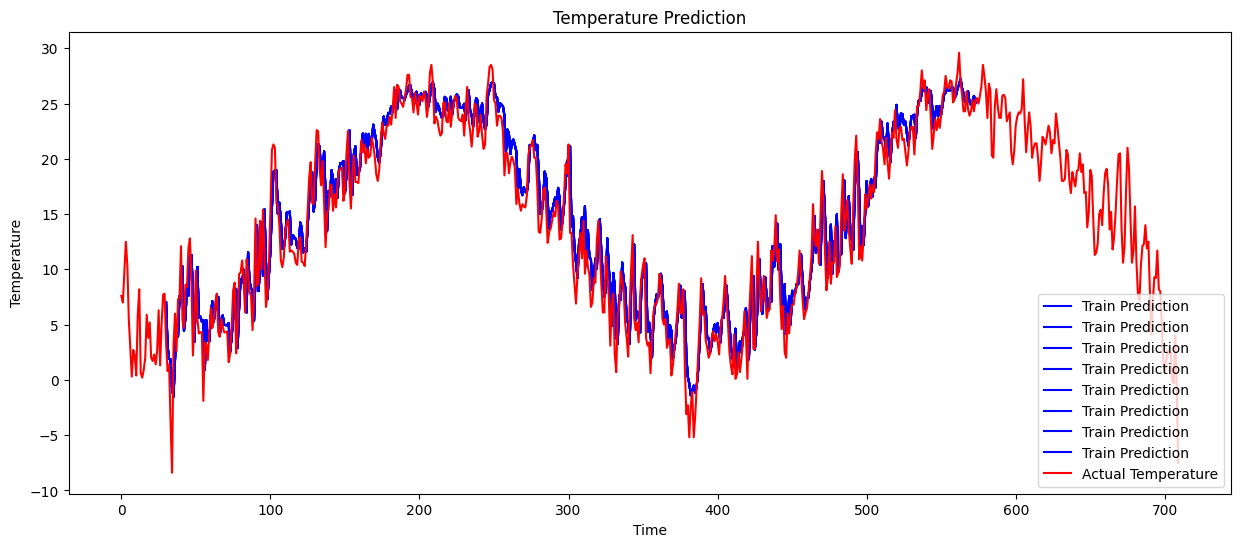

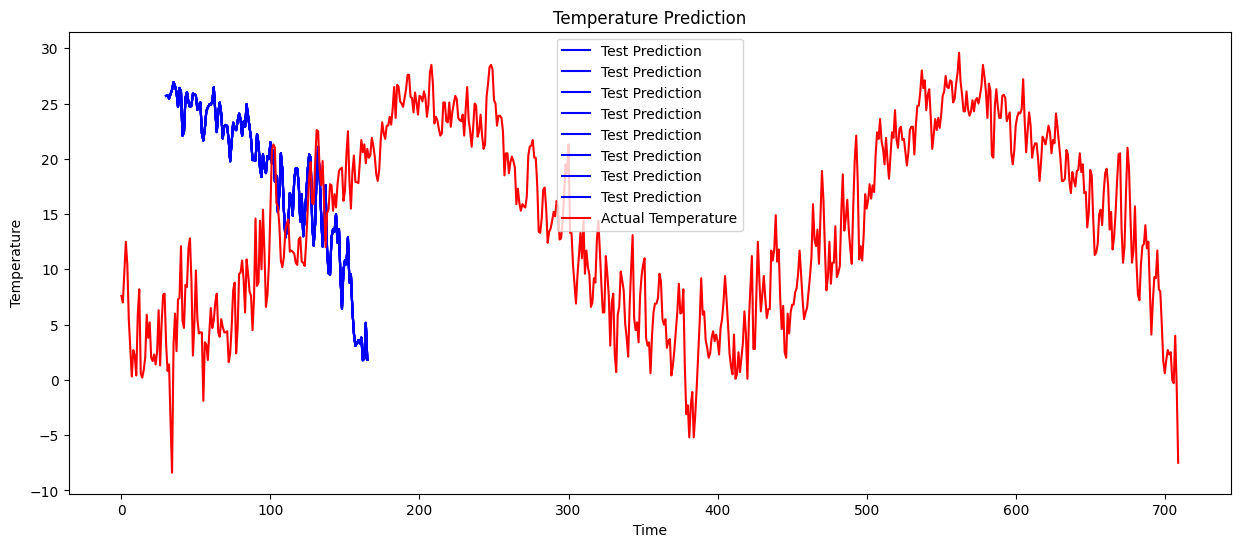

In [ ]:
trainPredictPlot = np.empty_like(temp_data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_predict)+sequence_length, :] = train_predict
testPredictPlot = np.empty_like(temp_data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[sequence_length:len(test_predict)+sequence_length, :] = test_predict

plt.figure(figsize=(15,6))
plt.plot(trainPredictPlot, color='blue', label='Train Prediction')
plt.plot(temp_data, color='red', label='Actual Temperature')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

plt.figure(figsize=(15,6))
plt.plot(testPredictPlot, color='blue', label='Test Prediction')
plt.plot(temp_data, color='red', label='Actual Temperature')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

Y_train_reshaped = Y_train.reshape(-1, 1)  # Reshape Y_train
Y_test_reshaped = Y_test.reshape(-1, 1)    # Reshape Y_test

target_scaler = MinMaxScaler(feature_range=(0, 1))

target_scaler.fit(data['tavg'].values.reshape(-1, 1))

train_predict_rescaled = target_scaler.inverse_transform(train_predict)
Y_train_rescaled = target_scaler.inverse_transform(Y_train_reshaped)
test_predict_rescaled = target_scaler.inverse_transform(test_predict)
Y_test_rescaled = target_scaler.inverse_transform(Y_test_reshaped)

train_mae = mean_absolute_error(Y_train_rescaled, train_predict_rescaled)
train_mse = mean_squared_error(Y_train_rescaled, train_predict_rescaled)
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(Y_test_rescaled, test_predict_rescaled)
test_mse = mean_squared_error(Y_test_rescaled, test_predict_rescaled)
test_rmse = np.sqrt(test_mse)

print("Training Set Accuracy:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")

print("\nTesting Set Accuracy:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")

Training Set Accuracy:
Mean Absolute Error (MAE): 70.65728043265202
Mean Squared Error (MSE): 8245.157140463285
Root Mean Squared Error (RMSE): 90.80284764512226

Testing Set Accuracy:
Mean Absolute Error (MAE): 74.34786446515248
Mean Squared Error (MSE): 9641.076060891555
Root Mean Squared Error (RMSE): 98.18898136192041


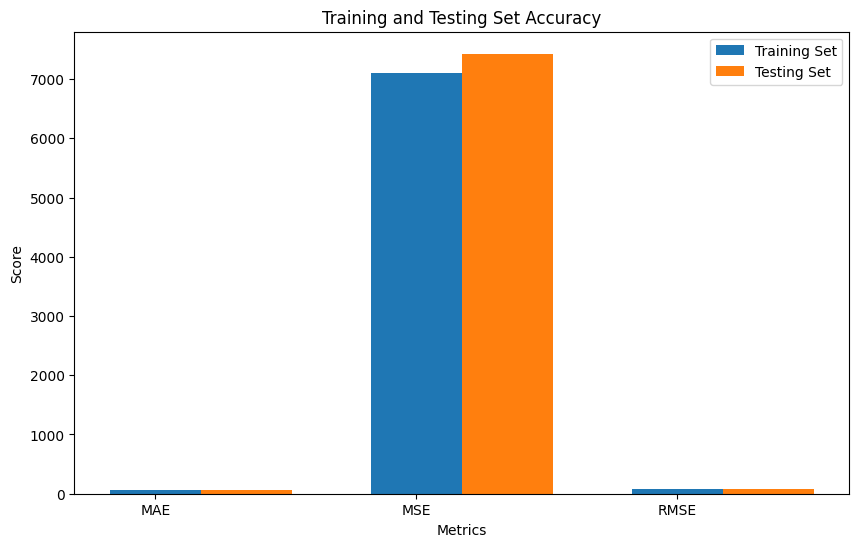

In [ ]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE']
train_scores = [train_mae, train_mse, train_rmse]
test_scores = [test_mae, test_mse, test_rmse]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.35, align='center', label='Training Set')
plt.bar([i + 0.35 for i in x], test_scores, width=0.35, align='center', label='Testing Set')

plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Training and Testing Set Accuracy")
plt.legend()
plt.show()

In [ ]:
!pip install requests
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 80.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from meteostat import Point, Daily
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
from datetime import timedelta, datetime

location = Point(40.7128, -74.0060)  # New York City coordinates
start = datetime.now() - timedelta(days=7)
end = datetime.now()

# Fetch the data
nycdata = Daily(location, start, end)
nycdata = nycdata.fetch()

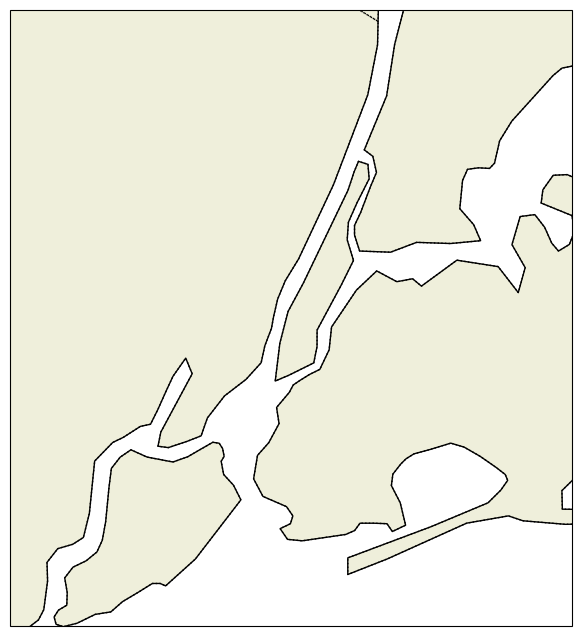

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-74.3, -73.7, 40.5, 41])

# Add geographical features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

In [ ]:
# Get the most recent data point for visualization
latest_temp = data['tavg'].iloc[-1]
latest_precip = data['prcp'].iloc[-1]
latest_wind = data['wspd'].iloc[-1]

In [ ]:
# Load a GeoDataFrame with NYC administrative boundaries (like boroughs or neighborhoods)
# For NYC, you could use an open dataset or download boundaries as a GeoJSON file.
# Here's an example with hypothetical file "nyc_boroughs.geojson":
!wget https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/new-york-city-boroughs.geojson -O nyc_boroughs.geojson # Download GeoJSON file
import geopandas as gpd

# Load the GeoDataFrame with NYC borough boundaries
nyc_boundaries = gpd.read_file("nyc_boroughs.geojson")
nyc_boundaries = nyc_boundaries.to_crs("EPSG:4326")  # Reproject to match WGS 84

--2024-12-11 20:18:50--  https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/new-york-city-boroughs.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2669814 (2.5M) [text/plain]
Saving to: ‘nyc_boroughs.geojson’

nyc_boroughs.geojso 100%[===================>]   2.55M  --.-KB/s    in 0.08s   

2024-12-11 20:18:51 (33.8 MB/s) - ‘nyc_boroughs.geojson’ saved [2669814/2669814]



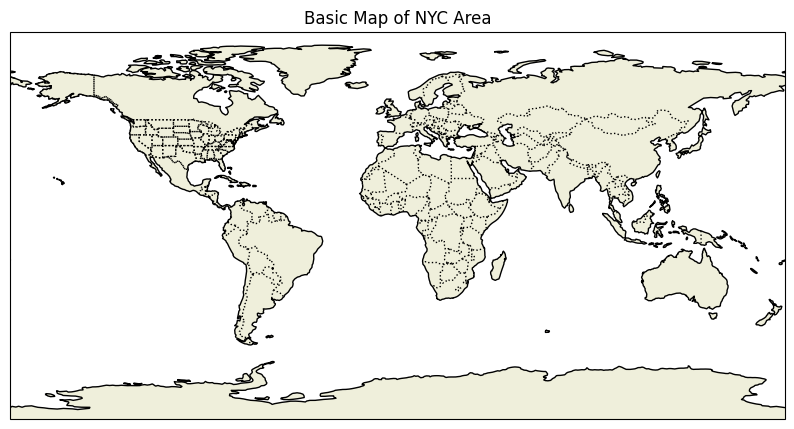

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add basic geographical features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

plt.title("Basic Map of NYC Area")
plt.show()


In [ ]:
import geopandas as gpd

# Load NYC boundaries GeoJSON
nyc_boundaries = gpd.read_file("nyc_boroughs.geojson")
nyc_boundaries = nyc_boundaries.to_crs("EPSG:4326")
print(nyc_boundaries.head())

            name  cartodb_id                       created_at  \
0  Staten Island           1 2013-03-09 02:42:03.692000+00:00   
1         Queens           2 2013-03-09 02:42:03.692000+00:00   
2       Brooklyn           3 2013-03-09 02:42:03.692000+00:00   
3      Manhattan           4 2013-03-09 02:42:03.692000+00:00   
4          Bronx           5 2013-03-09 02:42:03.692000+00:00   

                        updated_at  \
0 2013-03-09 02:42:03.989000+00:00   
1 2013-03-09 02:42:03.989000+00:00   
2 2013-03-09 02:42:03.989000+00:00   
3 2013-03-09 02:42:03.989000+00:00   
4 2013-03-09 02:42:03.989000+00:00   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  


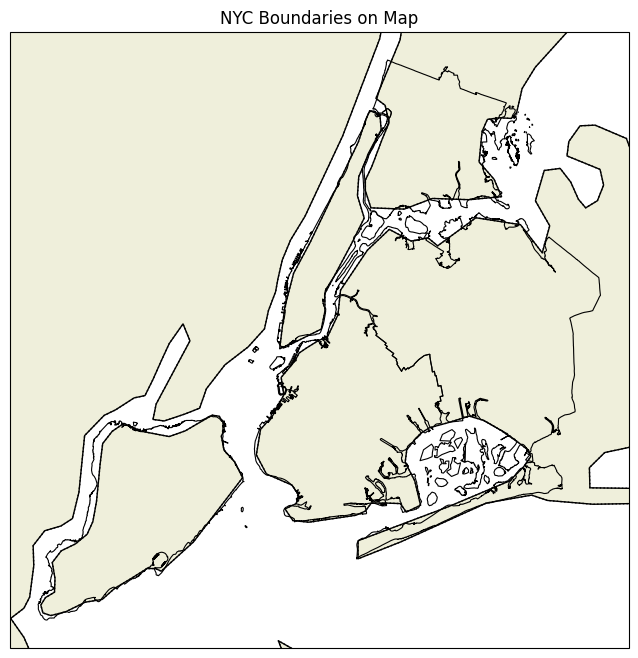

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Plot NYC boundaries
nyc_boundaries.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8)

plt.title("NYC Boundaries on Map")
plt.show()

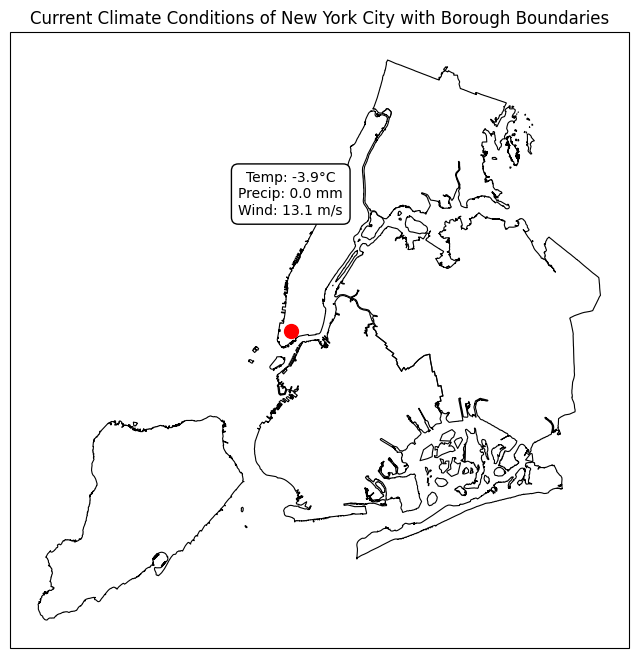

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot NYC boundaries
nyc_boundaries.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8)

# Get the most recent data point for visualization
latest_temp = nycdata['tavg'].iloc[-1]  # Most recent average temperature
latest_precip = nycdata['prcp'].iloc[-1]  # Most recent precipitation
latest_wind = nycdata['wspd'].iloc[-1]  # Most recent wind speed

# Plot NYC location with climate data
ax.plot(-74.0060, 40.7128, marker='o', color='red', markersize=10, transform=ccrs.PlateCarree())
ax.text(-74.0060, 40.8, f"Temp: {latest_temp:.1f}°C\nPrecip: {latest_precip:.1f} mm\nWind: {latest_wind:.1f} m/s",
        transform=ccrs.PlateCarree(), ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Set title and show map
plt.title("Current Climate Conditions of New York City with Borough Boundaries")
plt.show()